In [1]:
import calendar as cld

import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
import proplot as pplt  # New plot library (https://proplot.readthedocs.io/en/latest/)

pplt.rc[
    "savefig.dpi"
] = 300  # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
import matplotlib as mpl
from numba import njit, prange
from scipy.stats import chi2

mpl.rcParams["hatch.linewidth"] = 0.05  # previous pdf hatch linewidth
import sys

from matplotlib.dates import DateFormatter
from scipy.stats import linregress

In [2]:
normal_format = {
    "gridlinewidth": 0.1,
    "gridcolor": "gray8",
    "gridalpha": 0.5,
    "coast": True,
    "borders": True,
    "reso": "hi",
    "labels": True,
    "lonlines": 2,
    "latlines": 2,
    "abc": False,
    "latlim": [43.0, 48.5],
    "lonlim": [4.0, 16.0],
}
multiplot_format = {
    "gridlinewidth": 0.1,
    "gridcolor": "gray8",
    "gridalpha": 0.5,
    "coast": True,
    "borders": True,
    "reso": "hi",
    "labels": False,
    "lonlines": 2,
    "latlines": 2,
    "abc": False,
    "latlim": [43.0, 48.5],
    "lonlim": [4.0, 16.0],
}

imin = 32
imax = -30
jmin = 20
jmax = -15
ds = xr.open_dataset("/bettik/beaumetj/MARout/MAR-ERA-20C/MARgrid_EUf.nc")
lon = ds.LON[jmin:jmax, imin:imax]
lat = ds.LAT[jmin:jmax, imin:imax]
H = np.array(ds.SH[jmin:jmax, imin:imax])

seasons = ["DJF", "MAM", "JJA", "SON"]

In [3]:
ds_aerosols = xr.open_dataset(
    "/bettik/castelli/data/aerosols/aerosol_cams_climatology_49r2_1951-2019_4D.nc"
)

print(sys.getsizeof(ds_aerosols))

112


In [4]:
ds_aerosols

<xarray.Dataset>
Dimensions:                          (epoch: 13, month: 12, lev: 21, lat: 61,
                                      lon: 120)
Coordinates:
  * epoch                            (epoch) int16 1955 1960 1965 ... 2010 2015
  * month                            (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lev                              (lev) int16 1 2 3 4 5 6 ... 17 18 19 20 21
  * lat                              (lat) float32 90.0 87.0 ... -87.0 -90.0
  * lon                              (lon) float32 0.0 3.0 6.0 ... 354.0 357.0
Data variables: (12/17)
    pressure                         (month, lev, lat, lon) float32 ...
    Sea_Salt_bin1                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin2                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin3                    (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin1                (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin2                (month, lev, lat, lon) float32 ...
    ...                               ...
    Sulfates                         (epoch, month, lev, lat, lon) float32 ...
    Nitrate_fine                     (epoch, month, lev, lat, lon) float32 ...
    Nitrate_coarse                   (epoch, month, lev, lat, lon) float32 ...
    Ammonium                         (epoch, month, lev, lat, lon) float32 ...
    Biogenic_Secondary_Organic       (epoch, month, lev, lat, lon) float32 ...
    Anthropogenic_Secondary_Organic  (epoch, month, lev, lat, lon) float32 ...
Attributes:
    creation_date:   September 2023
    reference:       SEAS6 documentation
    source:          1951-2019 48r1 control run without scaling (CEDS/GFED fo...
    title:           4D monthly-mean aerosol climatology derived from the CAM...
    institution:     European Centre for Medium-Range Weather Forecasts
    creator_name:    Tim Stockdale
    dimensionality:  4
    ifs_cycle:       49r2
    cams_ifs_cycle:  48r1
    format_version:  2
    comment:         This file contains the aerosol climatology used in the r...

In [5]:
aerosol1 = np.array(
    ds_aerosols.Black_Carbon_hydrophilic.isel(epoch=0).isel(month=0).isel(lev=20)
)
aerosol1.shape

(61, 120)

/tmp/ipykernel_2348169/2591383476.py:1: ProplotWarning: rc setting 'small' was renamed to 'font.smallsize' in version 0.6.
  pplt.rc.update(small=18, large=16)
/tmp/ipykernel_2348169/2591383476.py:1: ProplotWarning: rc setting 'large' was renamed to 'font.largesize' in version 0.6.
  pplt.rc.update(small=18, large=16)
/home/castelli/miniforge3/envs/phd_v1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


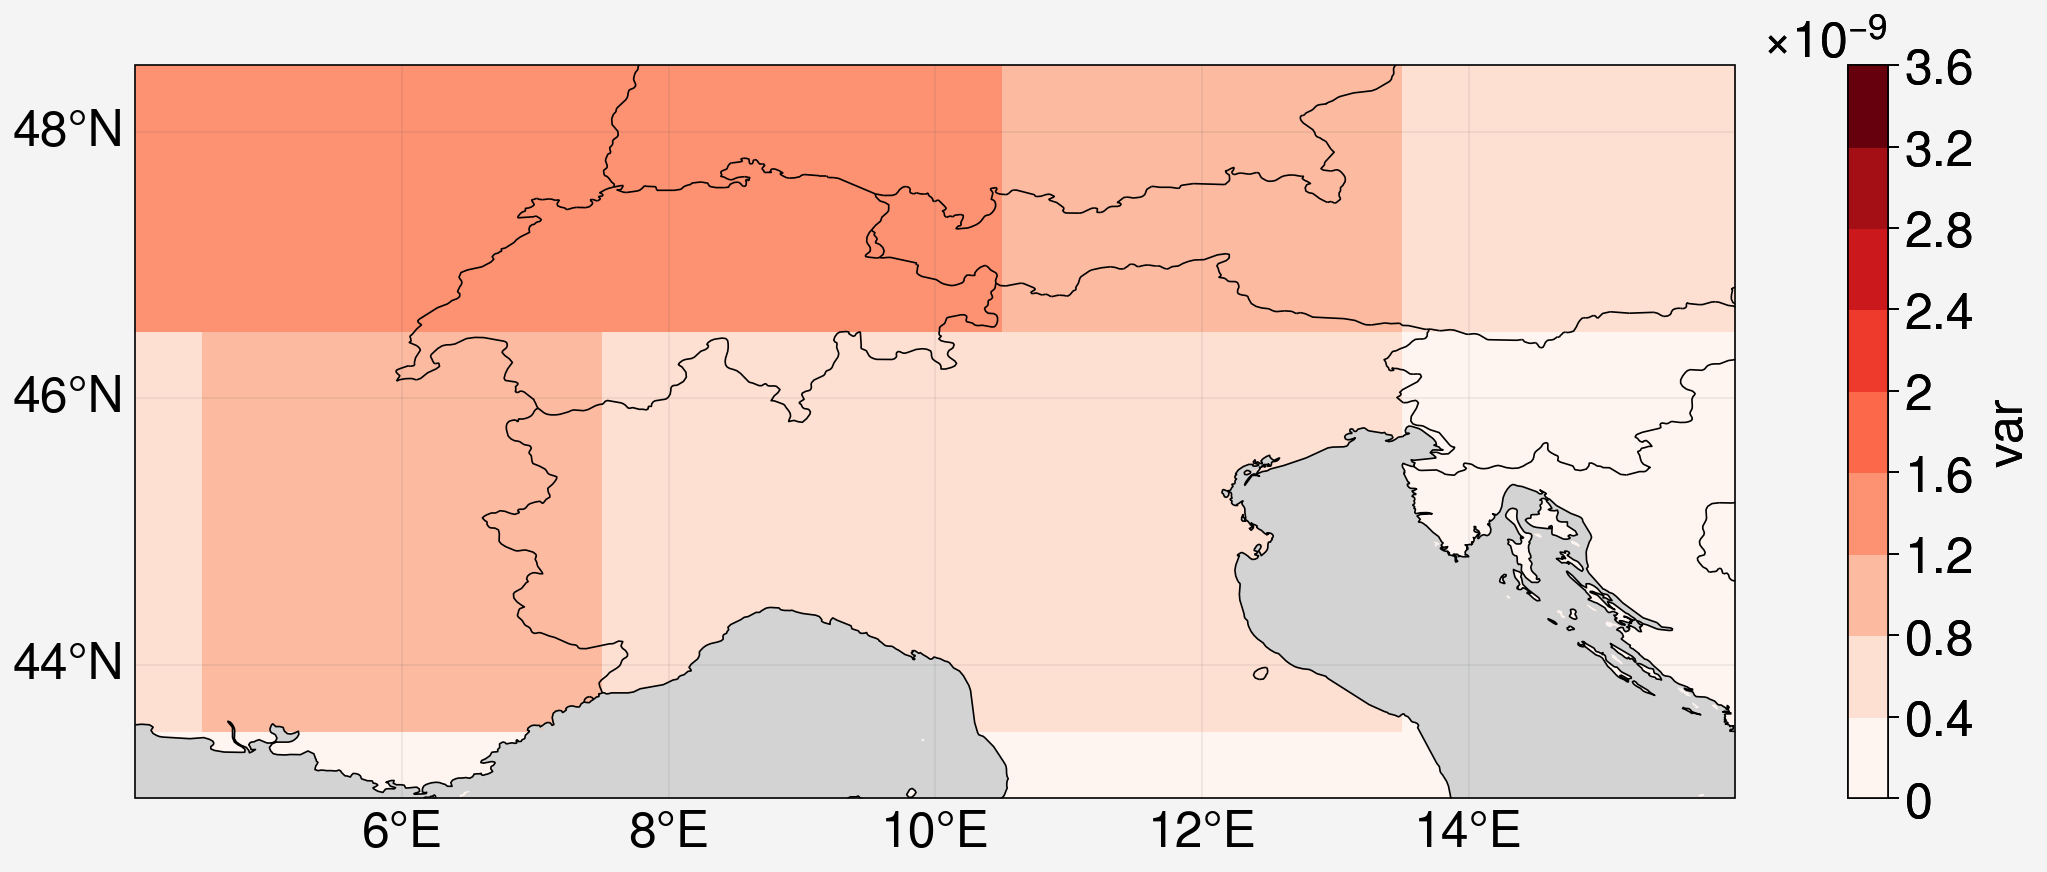

In [6]:
pplt.rc.update(small=18, large=16)

f, axs = pplt.subplots(proj="cyl", axwidth=8)


m = axs.pcolormesh(ds_aerosols.lon, ds_aerosols.lat, aerosol1, levels=10, cmap="Reds")
f.colorbar(m, label="var")

# axs.contour(lon, lat,alps)
# axs[2].contour(lon, lat,north_alps)
# axs[2].contour(lon, lat,south_alps)
axs.format(**normal_format)
axs.format(
    ocean=True, oceancolor="lightgray", reso="hi"
)  # , latlim=[40.,51.],lonlim=[0.,20.])

# axs.format(suptitle='Projection du réchauffement en été')

In [7]:
aerosol_cams_climatology_49r2_1955 = ds_aerosols.isel(epoch=0)
aerosol_cams_climatology_49r2_1955

<xarray.Dataset>
Dimensions:                          (month: 12, lev: 21, lat: 61, lon: 120)
Coordinates:
    epoch                            int16 1955
  * month                            (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lev                              (lev) int16 1 2 3 4 5 6 ... 17 18 19 20 21
  * lat                              (lat) float32 90.0 87.0 ... -87.0 -90.0
  * lon                              (lon) float32 0.0 3.0 6.0 ... 354.0 357.0
Data variables: (12/17)
    pressure                         (month, lev, lat, lon) float32 ...
    Sea_Salt_bin1                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin2                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin3                    (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin1                (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin2                (month, lev, lat, lon) float32 ...
    ...                               ...
    Sulfates                         (month, lev, lat, lon) float32 ...
    Nitrate_fine                     (month, lev, lat, lon) float32 ...
    Nitrate_coarse                   (month, lev, lat, lon) float32 ...
    Ammonium                         (month, lev, lat, lon) float32 ...
    Biogenic_Secondary_Organic       (month, lev, lat, lon) float32 ...
    Anthropogenic_Secondary_Organic  (month, lev, lat, lon) float32 ...
Attributes:
    creation_date:   September 2023
    reference:       SEAS6 documentation
    source:          1951-2019 48r1 control run without scaling (CEDS/GFED fo...
    title:           4D monthly-mean aerosol climatology derived from the CAM...
    institution:     European Centre for Medium-Range Weather Forecasts
    creator_name:    Tim Stockdale
    dimensionality:  4
    ifs_cycle:       49r2
    cams_ifs_cycle:  48r1
    format_version:  2
    comment:         This file contains the aerosol climatology used in the r...

In [8]:
aerosol_cams_climatology_49r2_1956 = (
    ds_aerosols.isel(epoch=0) * 0.8 + ds_aerosols.isel(epoch=1) * 0.2
)
aerosol_cams_climatology_49r2_1956

<xarray.Dataset>
Dimensions:                          (month: 12, lev: 21, lat: 61, lon: 120)
Coordinates:
  * month                            (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lev                              (lev) int16 1 2 3 4 5 6 ... 17 18 19 20 21
  * lat                              (lat) float32 90.0 87.0 ... -87.0 -90.0
  * lon                              (lon) float32 0.0 3.0 6.0 ... 354.0 357.0
Data variables: (12/17)
    pressure                         (month, lev, lat, lon) float32 100.0 ......
    Sea_Salt_bin1                    (month, lev, lat, lon) float32 2.376e-16...
    Sea_Salt_bin2                    (month, lev, lat, lon) float32 1.001e-25...
    Sea_Salt_bin3                    (month, lev, lat, lon) float32 1e-25 ......
    Mineral_Dust_bin1                (month, lev, lat, lon) float32 1.32e-17 ...
    Mineral_Dust_bin2                (month, lev, lat, lon) float32 1.256e-17...
    ...                               ...
    Sulfates                         (month, lev, lat, lon) float32 4.381e-15...
    Nitrate_fine                     (month, lev, lat, lon) float32 1e-25 ......
    Nitrate_coarse                   (month, lev, lat, lon) float32 1e-25 ......
    Ammonium                         (month, lev, lat, lon) float32 4.711e-18...
    Biogenic_Secondary_Organic       (month, lev, lat, lon) float32 5.293e-18...
    Anthropogenic_Secondary_Organic  (month, lev, lat, lon) float32 2.851e-20...

In [9]:
aerosol_cams_climatology_49r2_1957 = (
    ds_aerosols.isel(epoch=0) * 0.6 + ds_aerosols.isel(epoch=1) * 0.4
)
aerosol_cams_climatology_49r2_1958 = (
    ds_aerosols.isel(epoch=0) * 0.4 + ds_aerosols.isel(epoch=1) * 0.6
)
aerosol_cams_climatology_49r2_1959 = (
    ds_aerosols.isel(epoch=0) * 0.2 + ds_aerosols.isel(epoch=1) * 0.8
)
aerosol_cams_climatology_49r2_1960 = ds_aerosols.isel(epoch=1)

aerosol_cams_climatology_49r2_1961 = (
    ds_aerosols.isel(epoch=1) * 0.8 + ds_aerosols.isel(epoch=2) * 0.2
)
aerosol_cams_climatology_49r2_1962 = (
    ds_aerosols.isel(epoch=1) * 0.6 + ds_aerosols.isel(epoch=2) * 0.4
)
aerosol_cams_climatology_49r2_1963 = (
    ds_aerosols.isel(epoch=1) * 0.4 + ds_aerosols.isel(epoch=2) * 0.6
)
aerosol_cams_climatology_49r2_1964 = (
    ds_aerosols.isel(epoch=1) * 0.2 + ds_aerosols.isel(epoch=2) * 0.8
)
aerosol_cams_climatology_49r2_1965 = ds_aerosols.isel(epoch=2)

In [10]:
def yearly_interpolation(ds_aero, years):
    ds_YYYY = ds_aerosols.isel(epoch=0) + 0 * ds_aerosols.isel(epoch=1)
    multiplier = [0, 0.2, 0.4, 0.6, 0.8, 1]

    for year in range(years):
        print(year)
        if year == 0:
            continue
        j = year % 5
        # print("j = ",j)
        epo = year // 5
        # print("epo = ",epo)
        ds_YYYY = xr.concat(
            [
                ds_YYYY,
                ds_aerosols.isel(epoch=epo) * multiplier[-(j + 1)]
                + ds_aerosols.isel(epoch=epo + 1) * multiplier[j],
            ],
            dim="Year",
        )

    return ds_YYYY

In [11]:
ds_test = yearly_interpolation(ds_aerosols, years=10)

ds_test

0
1
2
3
4
5
6
7
8
9


<xarray.Dataset>
Dimensions:                          (month: 12, lev: 21, lat: 61, lon: 120,
                                      Year: 10)
Coordinates:
  * month                            (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lev                              (lev) int16 1 2 3 4 5 6 ... 17 18 19 20 21
  * lat                              (lat) float32 90.0 87.0 ... -87.0 -90.0
  * lon                              (lon) float32 0.0 3.0 6.0 ... 354.0 357.0
Dimensions without coordinates: Year
Data variables: (12/17)
    pressure                         (Year, month, lev, lat, lon) float32 100...
    Sea_Salt_bin1                    (Year, month, lev, lat, lon) float32 2.3...
    Sea_Salt_bin2                    (Year, month, lev, lat, lon) float32 1.0...
    Sea_Salt_bin3                    (Year, month, lev, lat, lon) float32 1e-...
    Mineral_Dust_bin1                (Year, month, lev, lat, lon) float32 1.3...
    Mineral_Dust_bin2                (Year, month, lev, lat, lon) float32 1.2...
    ...                               ...
    Sulfates                         (Year, month, lev, lat, lon) float32 4.5...
    Nitrate_fine                     (Year, month, lev, lat, lon) float32 1e-...
    Nitrate_coarse                   (Year, month, lev, lat, lon) float32 1e-...
    Ammonium                         (Year, month, lev, lat, lon) float32 4.8...
    Biogenic_Secondary_Organic       (Year, month, lev, lat, lon) float32 5.3...
    Anthropogenic_Secondary_Organic  (Year, month, lev, lat, lon) float32 2.6...

In [12]:
(ds_test.isel(Year=6) == aerosol_cams_climatology_49r2_1961).all()

<xarray.Dataset>
Dimensions:                          ()
Data variables: (12/17)
    pressure                         bool True
    Sea_Salt_bin1                    bool True
    Sea_Salt_bin2                    bool True
    Sea_Salt_bin3                    bool True
    Mineral_Dust_bin1                bool True
    Mineral_Dust_bin2                bool True
    ...                               ...
    Sulfates                         bool True
    Nitrate_fine                     bool True
    Nitrate_coarse                   bool True
    Ammonium                         bool True
    Biogenic_Secondary_Organic       bool True
    Anthropogenic_Secondary_Organic  bool True

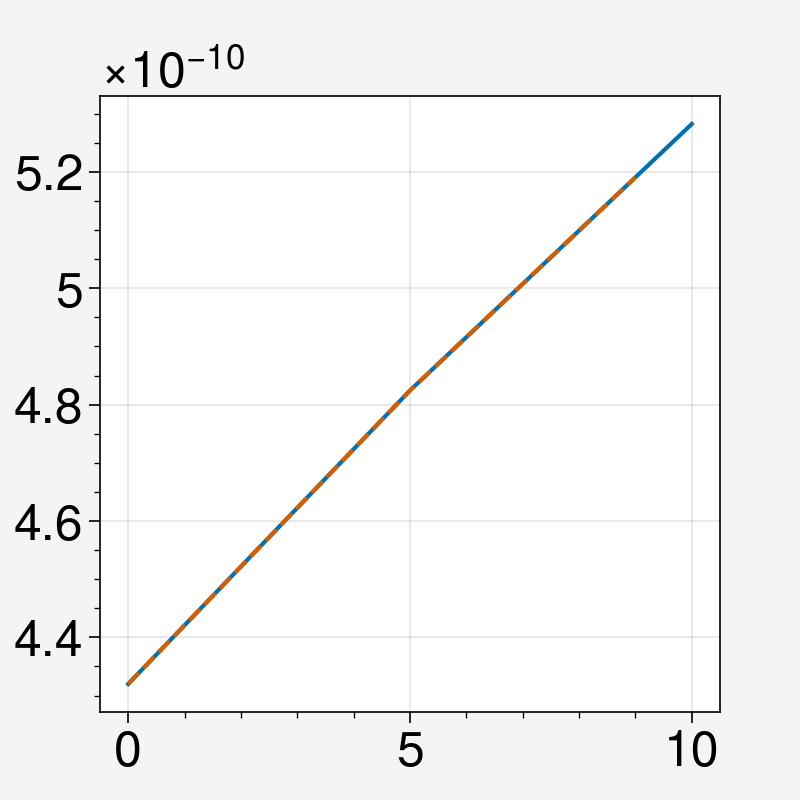

In [13]:
Sulfates_yearly_level21 = [
    aerosol_cams_climatology_49r2_1955.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1956.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1957.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1958.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1959.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1960.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1961.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1962.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1963.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1964.Sulfates.isel(lev=20).mean(),
    aerosol_cams_climatology_49r2_1965.Sulfates.isel(lev=20).mean(),
]
plt.plot(Sulfates_yearly_level21)

Sulfates_yearly_level21_v2 = ds_test.Sulfates.isel(lev=20).mean(
    dim=["month", "lat", "lon"]
)

plt.plot(Sulfates_yearly_level21_v2, linestyle="--")

### Whole period

In [5]:
ds_aerosol_yearly = yearly_interpolation(ds_aerosols, years=60)

ds_aerosol_yearly

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


<xarray.Dataset>
Dimensions:                          (month: 12, lev: 21, lat: 61, lon: 120,
                                      Year: 60)
Coordinates:
  * month                            (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lev                              (lev) int16 1 2 3 4 5 6 ... 17 18 19 20 21
  * lat                              (lat) float32 90.0 87.0 ... -87.0 -90.0
  * lon                              (lon) float32 0.0 3.0 6.0 ... 354.0 357.0
Dimensions without coordinates: Year
Data variables: (12/17)
    pressure                         (Year, month, lev, lat, lon) float32 100...
    Sea_Salt_bin1                    (Year, month, lev, lat, lon) float32 2.3...
    Sea_Salt_bin2                    (Year, month, lev, lat, lon) float32 1.0...
    Sea_Salt_bin3                    (Year, month, lev, lat, lon) float32 1e-...
    Mineral_Dust_bin1                (Year, month, lev, lat, lon) float32 1.3...
    Mineral_Dust_bin2                (Year, month, lev, lat, lon) float32 1.2...
    ...                               ...
    Sulfates                         (Year, month, lev, lat, lon) float32 4.5...
    Nitrate_fine                     (Year, month, lev, lat, lon) float32 1e-...
    Nitrate_coarse                   (Year, month, lev, lat, lon) float32 1e-...
    Ammonium                         (Year, month, lev, lat, lon) float32 4.8...
    Biogenic_Secondary_Organic       (Year, month, lev, lat, lon) float32 5.3...
    Anthropogenic_Secondary_Organic  (Year, month, lev, lat, lon) float32 2.6...

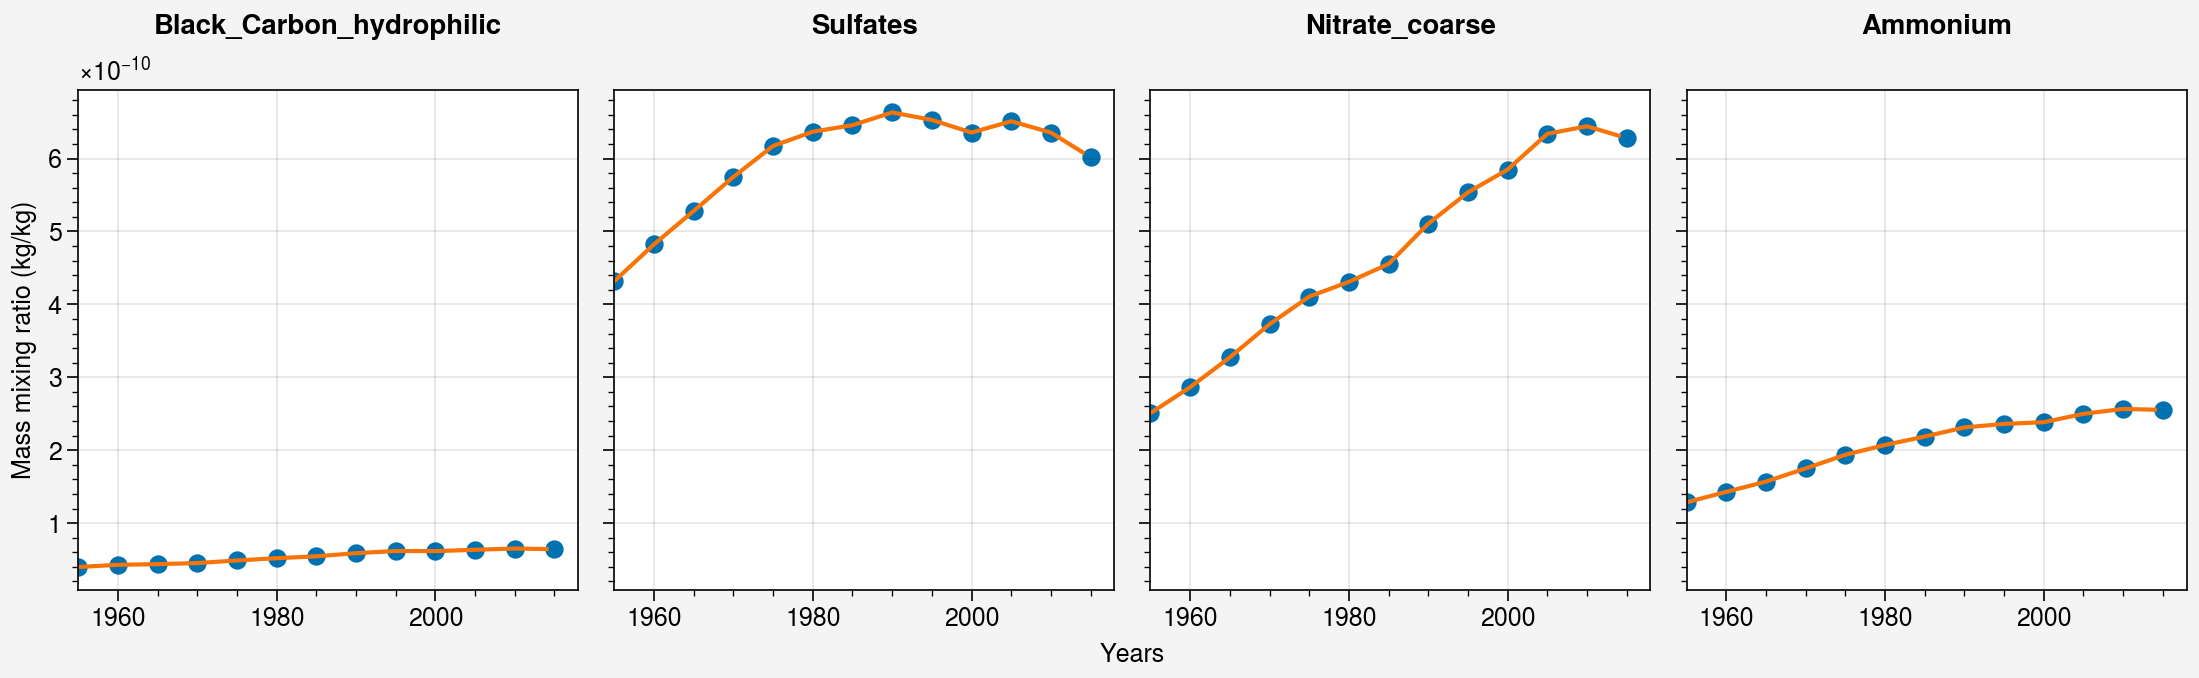

In [6]:
var_selection = ["Black_Carbon_hydrophilic", "Sulfates", "Nitrate_coarse", "Ammonium"]

f, axs = pplt.subplots(ncols=4)

for i in range(4):
    axs[i].plot(
        np.arange(1955, 2015, 1),
        ds_aerosol_yearly[var_selection[i]]
        .isel(lev=20)
        .mean(dim=["month", "lat", "lon"]),
        c="orange",
    )

    axs[i].scatter(
        np.arange(1955, 2016, 5),
        ds_aerosols[var_selection[i]].isel(lev=20).mean(dim=["month", "lat", "lon"]),
    )

axs.format(collabels=var_selection, xlabel="Years", ylabel="Mass mixing ratio (kg/kg)")

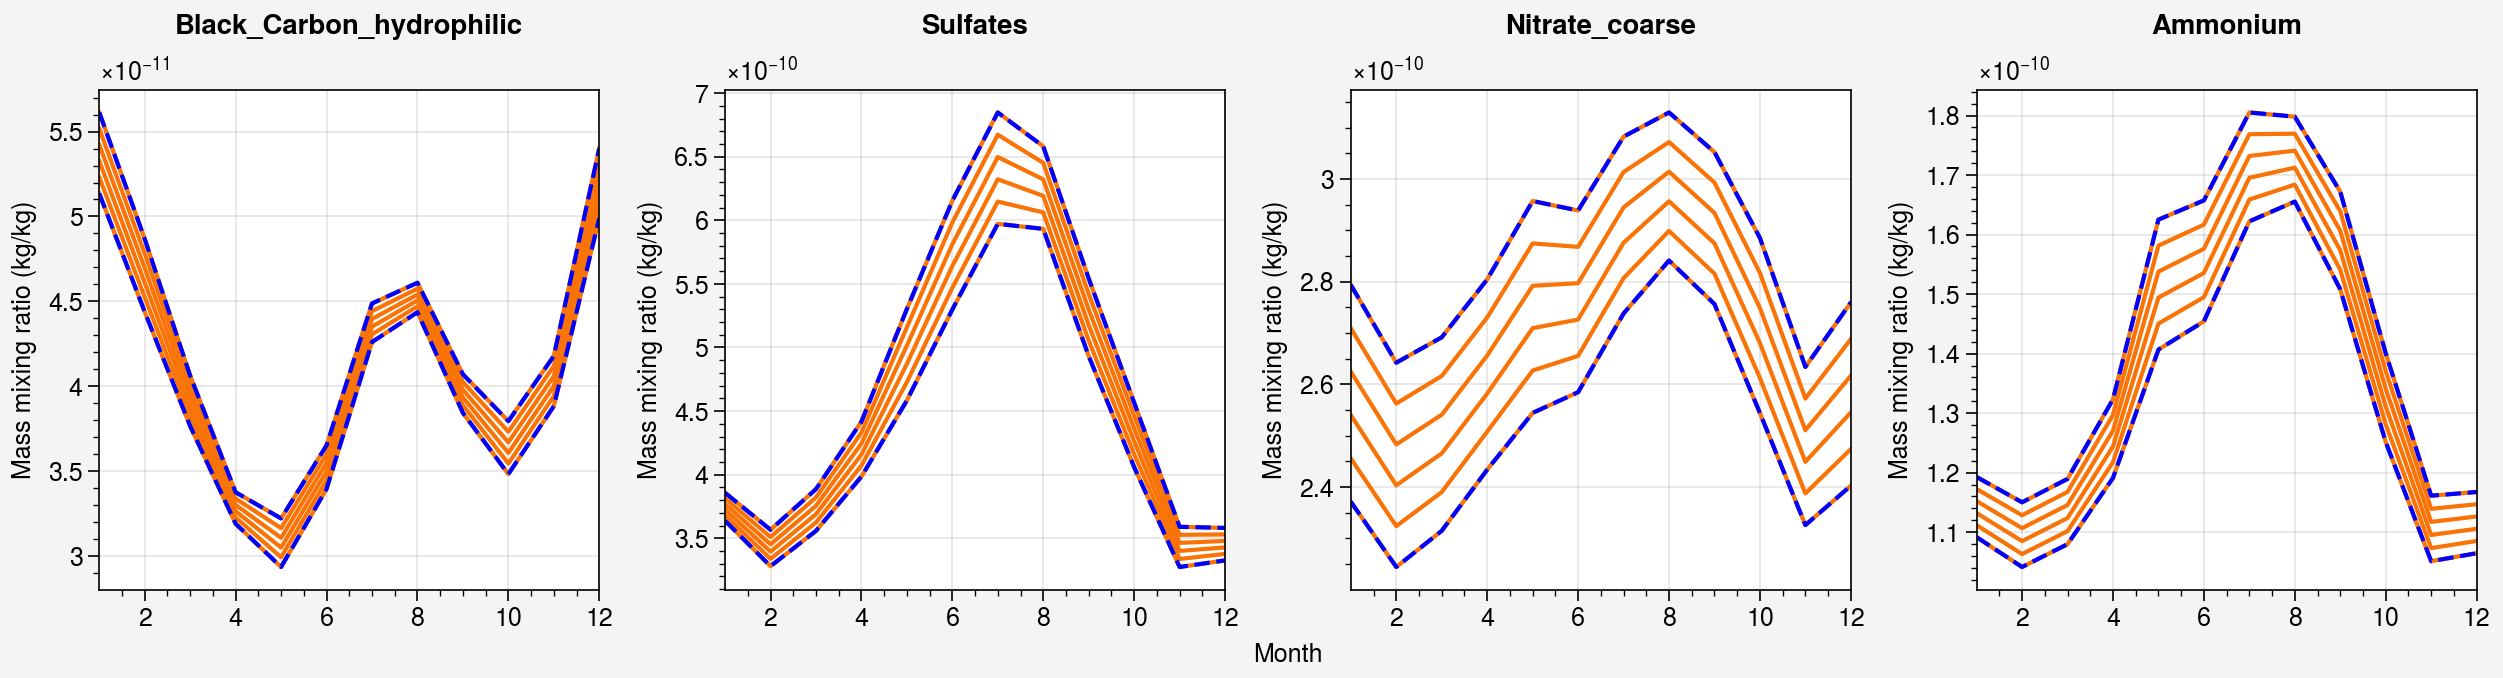

In [11]:
f, axs = pplt.subplots(ncols=4, sharey=False)

for i in range(4):
    for year in range(6):
        axs[i].plot(
            np.arange(1, 13, 1),
            ds_aerosol_yearly[var_selection[i]]
            .isel(lev=20)
            .mean(dim=["lat", "lon"])[year],
            c="orange",
        )
    axs[i].plot(
        np.arange(1, 13, 1),
        ds_aerosols[var_selection[i]].isel(lev=20).mean(dim=["lat", "lon"])[0],
        linestyle="--",
        c="b",
    )
    axs[i].plot(
        np.arange(1, 13, 1),
        ds_aerosols[var_selection[i]].isel(lev=20).mean(dim=["lat", "lon"])[1],
        linestyle="--",
        c="b",
    )

axs.format(collabels=var_selection, xlabel="Month", ylabel="Mass mixing ratio (kg/kg)")

In [16]:
# ds_aerosol_yearly.isel(Year=0)

# for i in range(60):
#    yr = i+1955
#    ds_aerosol_yearly.isel(Year=i).to_netcdf(path=f'/bettik/castelli/data/aerosols/yearly/aerosol_cams_climatology_49r2_4D_{yr}.nc')

In [17]:
ds_aerosols_1955 = xr.open_dataset(
    "/bettik/castelli/data/aerosols/yearly/aerosol_cams_climatology_49r2_4D_1955.nc"
)

print(sys.getsizeof(ds_aerosols_1955))

112


In [18]:
ds_aerosols_1960 = xr.open_dataset(
    "/bettik/castelli/data/aerosols/yearly/aerosol_cams_climatology_49r2_4D_1960.nc"
)
ds_aerosols_1960

<xarray.Dataset>
Dimensions:                          (month: 12, lev: 21, lat: 61, lon: 120)
Coordinates:
  * month                            (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lev                              (lev) int16 1 2 3 4 5 6 ... 17 18 19 20 21
  * lat                              (lat) float32 90.0 87.0 ... -87.0 -90.0
  * lon                              (lon) float32 0.0 3.0 6.0 ... 354.0 357.0
Data variables: (12/17)
    pressure                         (month, lev, lat, lon) float32 ...
    Sea_Salt_bin1                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin2                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin3                    (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin1                (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin2                (month, lev, lat, lon) float32 ...
    ...                               ...
    Sulfates                         (month, lev, lat, lon) float32 ...
    Nitrate_fine                     (month, lev, lat, lon) float32 ...
    Nitrate_coarse                   (month, lev, lat, lon) float32 ...
    Ammonium                         (month, lev, lat, lon) float32 ...
    Biogenic_Secondary_Organic       (month, lev, lat, lon) float32 ...
    Anthropogenic_Secondary_Organic  (month, lev, lat, lon) float32 ...

In [21]:
ds_aerosols_1965 = xr.open_dataset(
    "/bettik/castelli/data/aerosols/yearly/aerosol_cams_climatology_49r2_4D_1965.nc"
)

In [22]:
(ds_aerosols.isel(epoch=2) == ds_aerosols_1965).all()

<xarray.Dataset>
Dimensions:                          ()
Coordinates:
    epoch                            int16 1965
Data variables: (12/17)
    pressure                         bool True
    Sea_Salt_bin1                    bool True
    Sea_Salt_bin2                    bool True
    Sea_Salt_bin3                    bool True
    Mineral_Dust_bin1                bool True
    Mineral_Dust_bin2                bool True
    ...                               ...
    Sulfates                         bool True
    Nitrate_fine                     bool True
    Nitrate_coarse                   bool True
    Ammonium                         bool True
    Biogenic_Secondary_Organic       bool True
    Anthropogenic_Secondary_Organic  bool True

In [5]:
aerosol_cams_climatology_49r2_2015 = ds_aerosols.isel(epoch=12)

In [6]:
ds_aerosols.isel(epoch=12).to_netcdf(
    path=f"/bettik/castelli/data/aerosols/yearly/aerosol_cams_climatology_49r2_4D_2015.nc"
)

### Comparison to static aerosols

In [3]:
ds_aerosols = xr.open_dataset(
    "/bettik/castelli/data/aerosols/aerosol_cams_climatology_49r2_1951-2019_4D.nc"
)

ds_aerosols

<xarray.Dataset>
Dimensions:                          (epoch: 13, month: 12, lev: 21, lat: 61,
                                      lon: 120)
Coordinates:
  * epoch                            (epoch) int16 1955 1960 1965 ... 2010 2015
  * month                            (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lev                              (lev) int16 1 2 3 4 5 6 ... 17 18 19 20 21
  * lat                              (lat) float32 90.0 87.0 ... -87.0 -90.0
  * lon                              (lon) float32 0.0 3.0 6.0 ... 354.0 357.0
Data variables: (12/17)
    pressure                         (month, lev, lat, lon) float32 ...
    Sea_Salt_bin1                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin2                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin3                    (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin1                (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin2                (month, lev, lat, lon) float32 ...
    ...                               ...
    Sulfates                         (epoch, month, lev, lat, lon) float32 ...
    Nitrate_fine                     (epoch, month, lev, lat, lon) float32 ...
    Nitrate_coarse                   (epoch, month, lev, lat, lon) float32 ...
    Ammonium                         (epoch, month, lev, lat, lon) float32 ...
    Biogenic_Secondary_Organic       (epoch, month, lev, lat, lon) float32 ...
    Anthropogenic_Secondary_Organic  (epoch, month, lev, lat, lon) float32 ...
Attributes:
    creation_date:   September 2023
    reference:       SEAS6 documentation
    source:          1951-2019 48r1 control run without scaling (CEDS/GFED fo...
    title:           4D monthly-mean aerosol climatology derived from the CAM...
    institution:     European Centre for Medium-Range Weather Forecasts
    creator_name:    Tim Stockdale
    dimensionality:  4
    ifs_cycle:       49r2
    cams_ifs_cycle:  48r1
    format_version:  2
    comment:         This file contains the aerosol climatology used in the r...

In [4]:
ds_static = xr.open_dataset(
    "/home/castelli/MAR/src/datMAR/climatologies/aerosol_cams_climatology_43r3_v2_3D.nc"
)

ds_static

<xarray.Dataset>
Dimensions:                     (lev: 60, month: 12, lat: 61, lon: 120)
Coordinates:
  * lev                         (lev) int16 1 2 3 4 5 6 7 ... 55 56 57 58 59 60
  * month                       (month) int16 1 2 3 4 5 6 7 8 9 10 11 12
  * lat                         (lat) float32 90.0 87.0 84.0 ... -87.0 -90.0
  * lon                         (lon) float32 0.0 3.0 6.0 ... 351.0 354.0 357.0
Data variables:
    pressure                    (month, lev, lat, lon) float32 ...
    Sea_Salt_bin1               (month, lev, lat, lon) float32 ...
    Sea_Salt_bin2               (month, lev, lat, lon) float32 ...
    Sea_Salt_bin3               (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin1           (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin2           (month, lev, lat, lon) float32 ...
    Mineral_Dust_bin3           (month, lev, lat, lon) float32 ...
    Organic_Matter_hydrophilic  (month, lev, lat, lon) float32 ...
    Organic_Matter_hydrophobic  (month, lev, lat, lon) float32 ...
    Black_Carbon_hydrophilic    (month, lev, lat, lon) float32 ...
    Black_Carbon_hydrophobic    (month, lev, lat, lon) float32 ...
    Sulfates                    (month, lev, lat, lon) float32 ...
Attributes:
    creation_date:   Fri  5 May 10:45:05 BST 2017
    source:          2003-2011 IFS control run "gbst", with total aerosol opt...
    title:           3D monthly-mean aerosol climatology derived from the CAM...
    creator_name:    Alessio Bozzo
    institution:     European Centre for Medium-Range Weather Forecasts
    history:         Fri  5 May 10:45:05 BST 2017: Original data created by A...
    references:      Bozzo, A., A. Benedetti, J. Flemming, J., Z. Kipling and...
    ifs_cycle:       43r3
    dimensionality:  3
    format_version:  2
    comment:         This file contains the aerosol climatologies as a functi...

/tmp/ipykernel_1714088/1363439356.py:1: ProplotWarning: rc setting 'small' was renamed to 'font.smallsize' in version 0.6.
  pplt.rc.update(small=18, large=16)
/tmp/ipykernel_1714088/1363439356.py:1: ProplotWarning: rc setting 'large' was renamed to 'font.largesize' in version 0.6.
  pplt.rc.update(small=18, large=16)
/home/castelli/miniforge3/envs/phd_v1/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


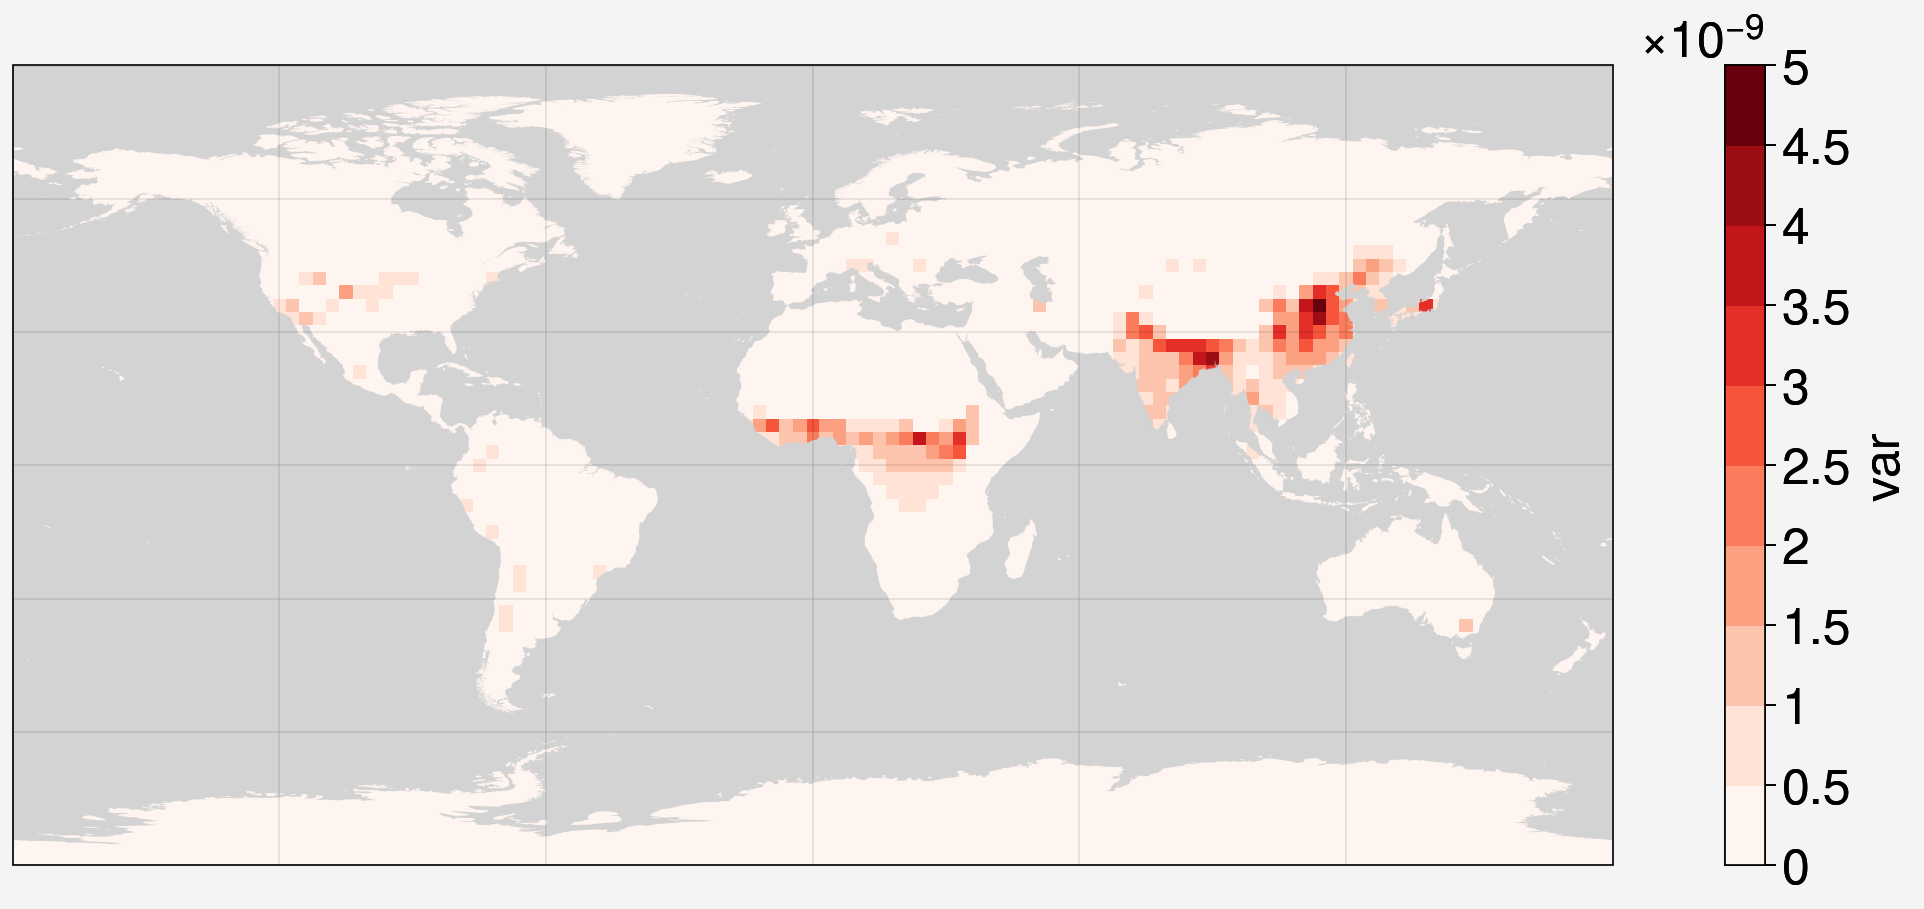

In [6]:
pplt.rc.update(small=18, large=16)

f, axs = pplt.subplots(proj="cyl", axwidth=8)


m = axs.pcolormesh(
    ds_static.lon,
    ds_static.lat,
    np.array(ds_static.Black_Carbon_hydrophilic.isel(month=0).isel(lev=59)),
    levels=10,
    cmap="Reds",
)
f.colorbar(m, label="var")

# axs.contour(lon, lat,alps)
# axs[2].contour(lon, lat,north_alps)
# axs[2].contour(lon, lat,south_alps)
# axs.format(**normal_format)
axs.format(
    ocean=True, oceancolor="lightgray", reso="hi"
)  # , latlim=[40.,51.],lonlim=[0.,20.])

In [7]:
# (ds_static == ds_aerosols.isel(epoch=12)).all()

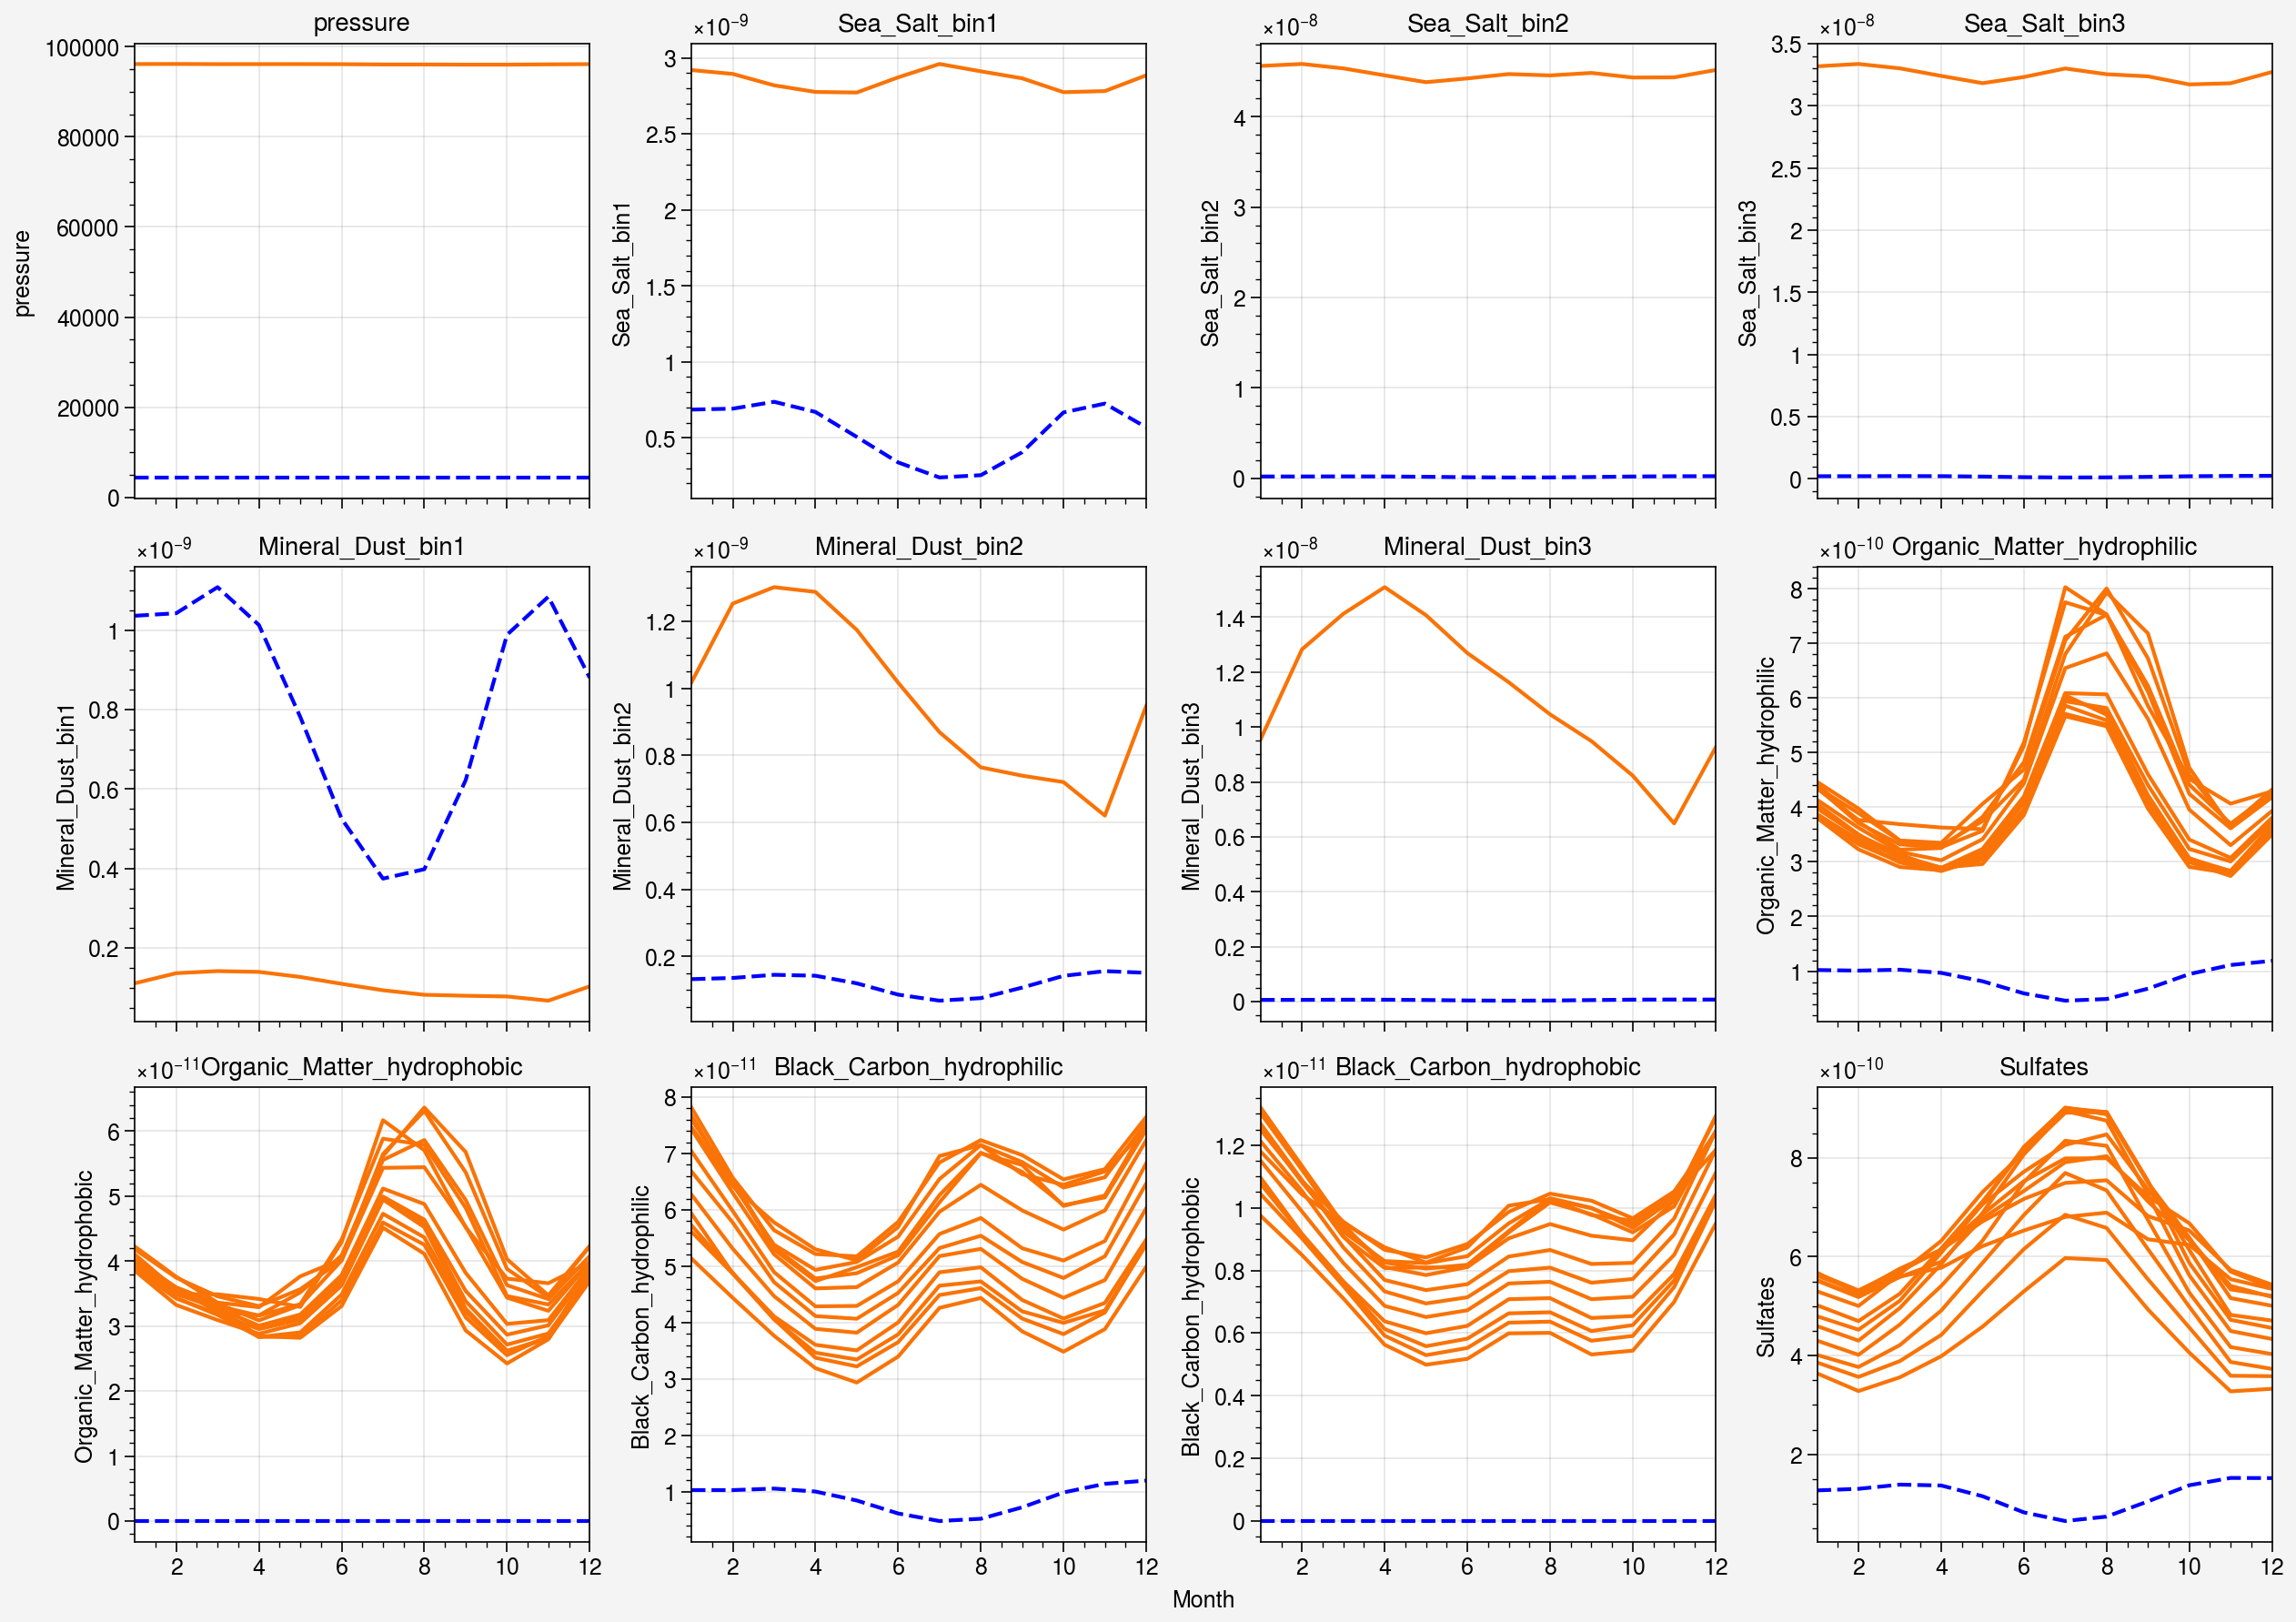

In [5]:
var_selection = [
    "pressure",
    "Sea_Salt_bin1",
    "Sea_Salt_bin2",
    "Sea_Salt_bin3",
    "Mineral_Dust_bin1",
    "Mineral_Dust_bin2",
    "Mineral_Dust_bin3",
    "Organic_Matter_hydrophilic",
    "Organic_Matter_hydrophobic",
    "Black_Carbon_hydrophilic",
    "Black_Carbon_hydrophobic",
    "Sulfates",
]

f, axs = pplt.subplots(ncols=4, nrows=3, sharey=False)

level = 20

for i in range(12):
    axs[i].format(title=var_selection[i])
    axs[i].plot(
        np.arange(1, 13, 1),
        ds_static[var_selection[i]].isel(lev=level).mean(dim=["lat", "lon"]),
        linestyle="--",
        c="b",
    )
    if i < 7:
        axs[i].plot(
            np.arange(1, 13, 1),
            ds_aerosols[var_selection[i]].isel(lev=level).mean(dim=["lat", "lon"]),
            c="orange",
        )
    else:
        for epo in range(13):
            axs[i].plot(
                np.arange(1, 13, 1),
                ds_aerosols[var_selection[i]]
                .isel(epoch=epo)
                .isel(lev=level)
                .mean(dim=["lat", "lon"]),
                c="orange",
            )

axs.format(xlabel="Month")  # ,ylabel='Mass mixing ratio (kg/kg)')

/tmp/ipykernel_280625/3422500243.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


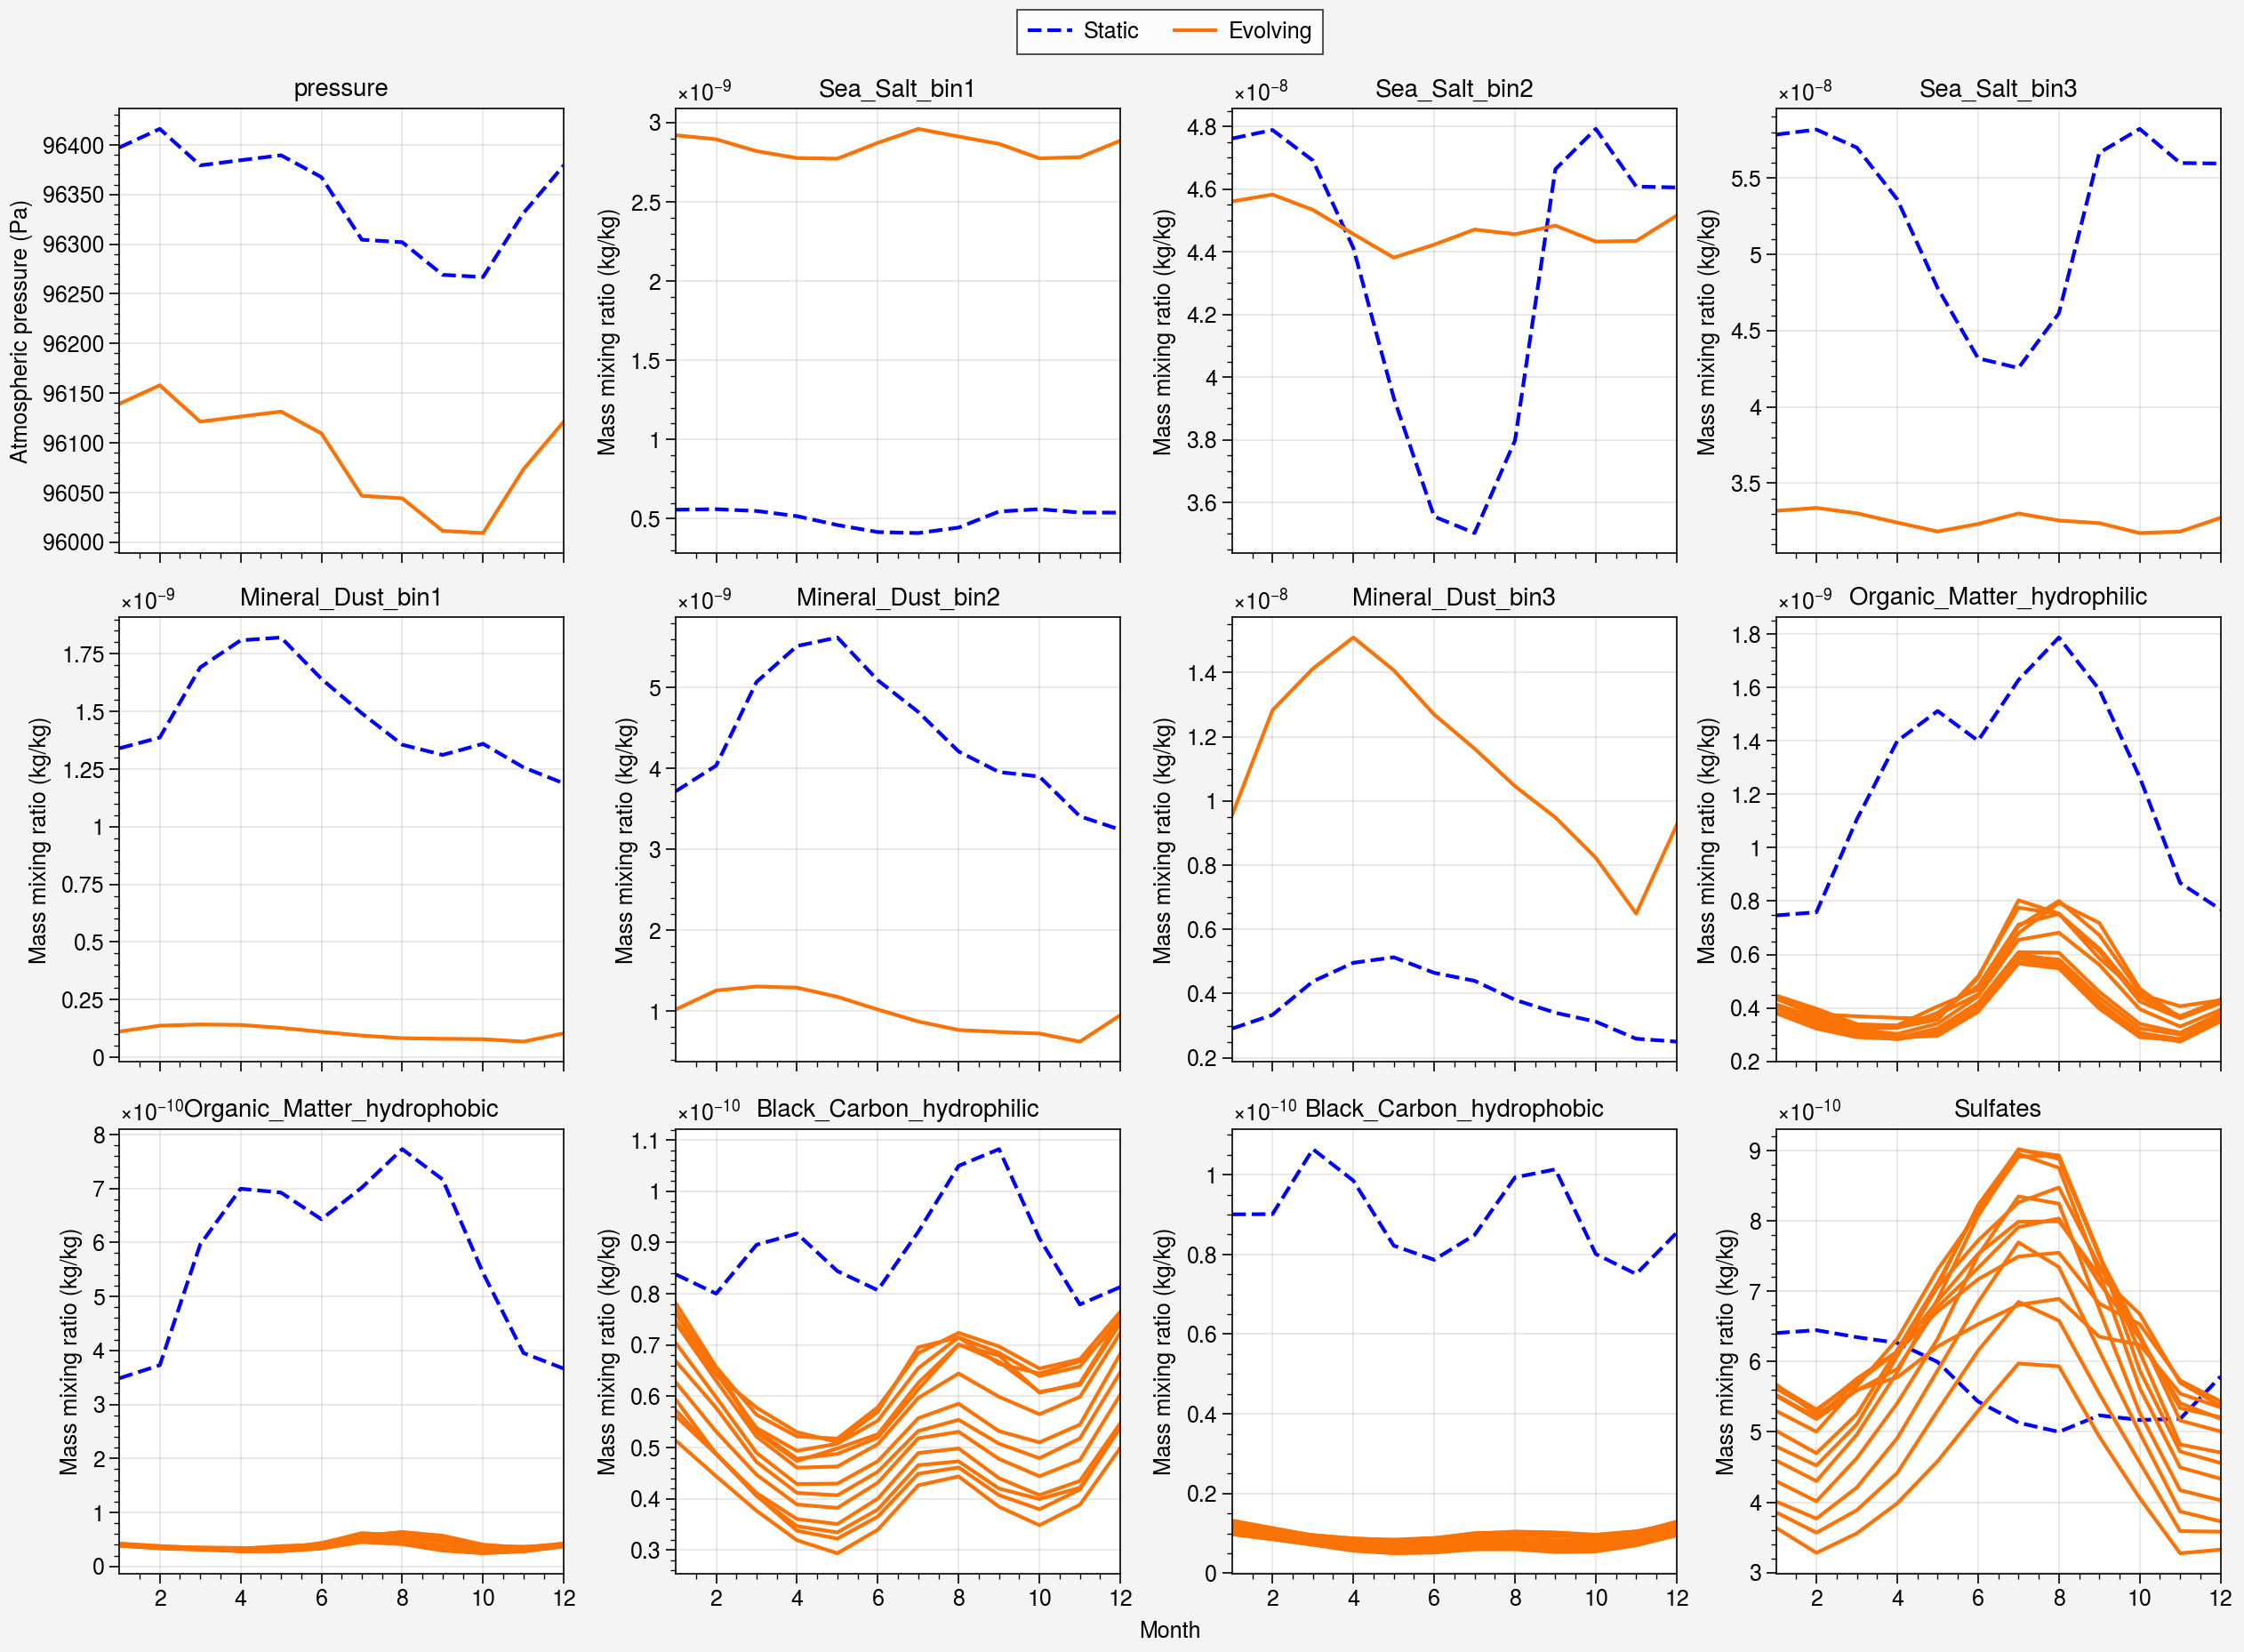

In [13]:
# pplt.rc.update(small=18, large=16)

var_selection = [
    "pressure",
    "Sea_Salt_bin1",
    "Sea_Salt_bin2",
    "Sea_Salt_bin3",
    "Mineral_Dust_bin1",
    "Mineral_Dust_bin2",
    "Mineral_Dust_bin3",
    "Organic_Matter_hydrophilic",
    "Organic_Matter_hydrophobic",
    "Black_Carbon_hydrophilic",
    "Black_Carbon_hydrophobic",
    "Sulfates",
]

f, axs = pplt.subplots(ncols=4, nrows=3, sharey=False)

level = -1

for i in range(12):
    axs[i].format(title=var_selection[i])
    static = axs[i].plot(
        np.arange(1, 13, 1),
        ds_static[var_selection[i]].isel(lev=level).mean(dim=["lat", "lon"]),
        linestyle="--",
        c="b",
        label="Static",
    )
    if i < 7:
        axs[i].plot(
            np.arange(1, 13, 1),
            ds_aerosols[var_selection[i]].isel(lev=level).mean(dim=["lat", "lon"]),
            c="orange",
        )
    else:
        for epo in range(13):
            evolving = axs[i].plot(
                np.arange(1, 13, 1),
                ds_aerosols[var_selection[i]]
                .isel(epoch=epo)
                .isel(lev=level)
                .mean(dim=["lat", "lon"]),
                c="orange",
                label="Evolving",
            )

f.legend([static, evolving], loc="top")
axs.format(xlabel="Month", ylabel="Mass mixing ratio (kg/kg)")
axs[0].format(ylabel="Atmospheric pressure (Pa)")

f.savefig("/bettik/castelli/figs/static_vs_evolving_aerosols2.png")
f.show()

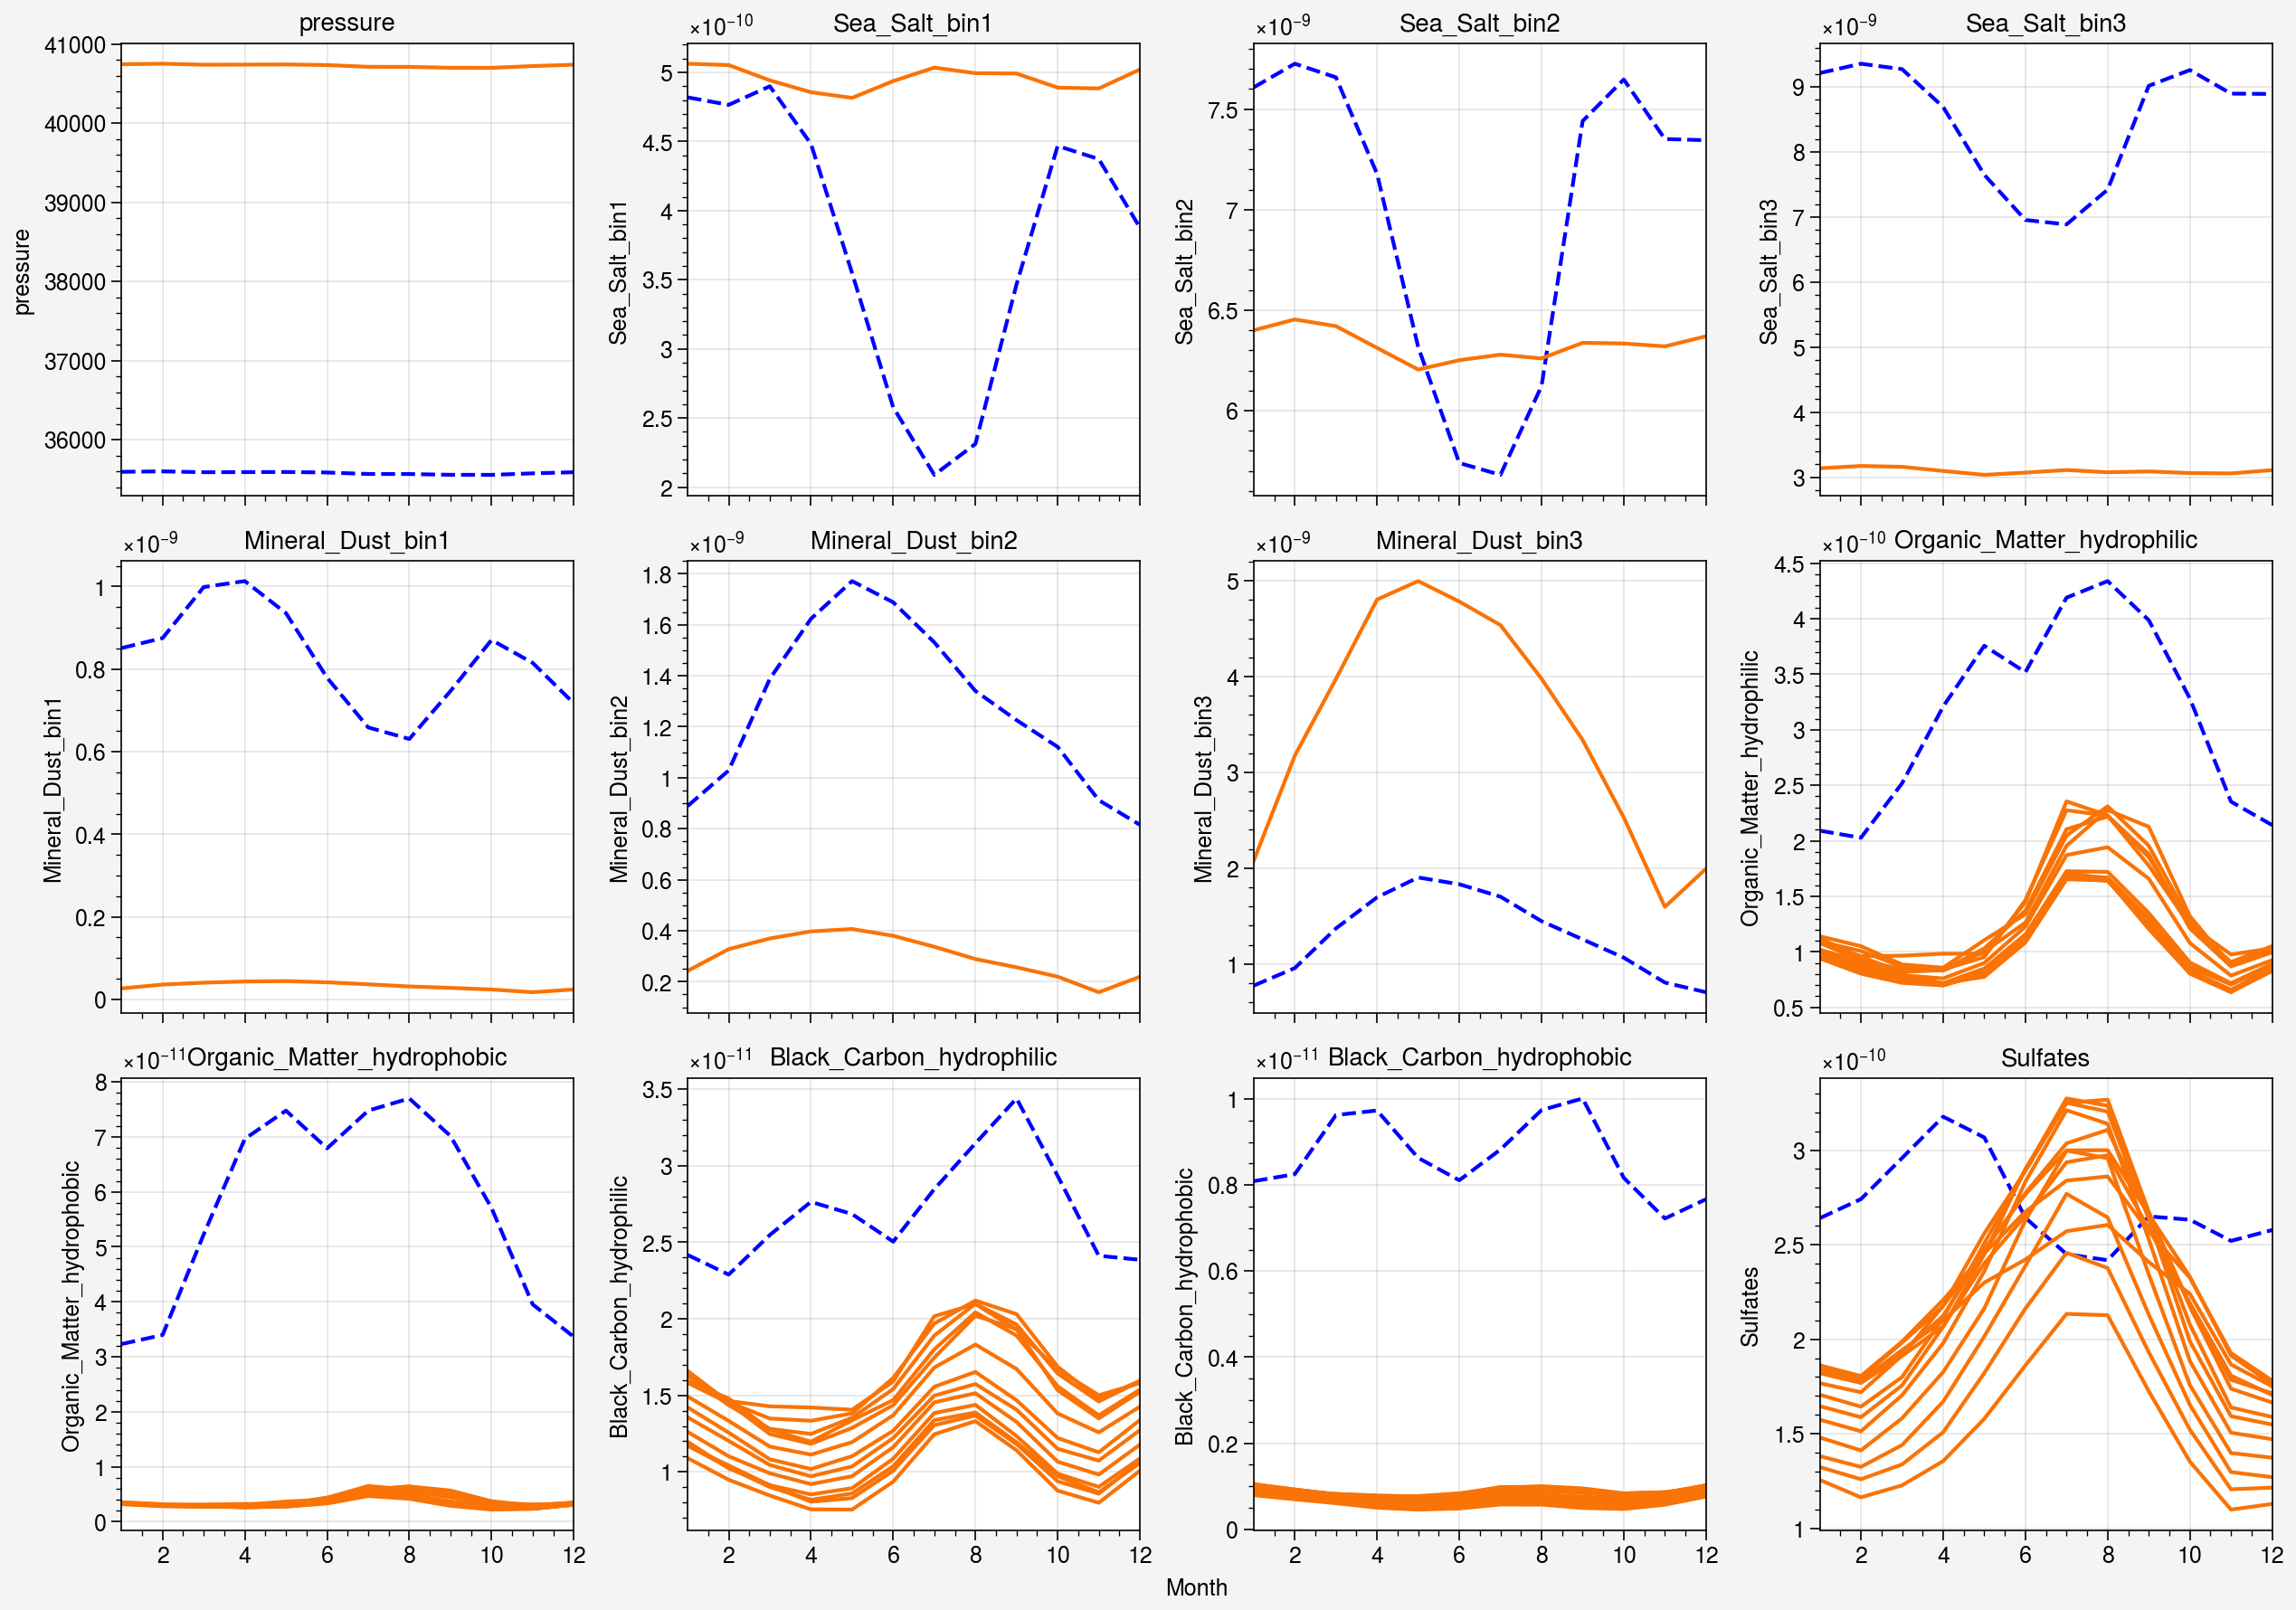

In [8]:
var_selection = [
    "pressure",
    "Sea_Salt_bin1",
    "Sea_Salt_bin2",
    "Sea_Salt_bin3",
    "Mineral_Dust_bin1",
    "Mineral_Dust_bin2",
    "Mineral_Dust_bin3",
    "Organic_Matter_hydrophilic",
    "Organic_Matter_hydrophobic",
    "Black_Carbon_hydrophilic",
    "Black_Carbon_hydrophobic",
    "Sulfates",
]

f, axs = pplt.subplots(ncols=4, nrows=3, sharey=False)

for i in range(12):
    axs[i].format(title=var_selection[i])
    axs[i].plot(
        np.arange(1, 13, 1),
        ds_static[var_selection[i]].mean(dim=["lat", "lon", "lev"]),
        linestyle="--",
        c="b",
    )
    if i < 7:
        axs[i].plot(
            np.arange(1, 13, 1),
            ds_aerosols[var_selection[i]].mean(dim=["lat", "lon", "lev"]),
            c="orange",
        )
    else:
        for epo in range(13):
            axs[i].plot(
                np.arange(1, 13, 1),
                ds_aerosols[var_selection[i]]
                .isel(epoch=epo)
                .mean(dim=["lat", "lon", "lev"]),
                c="orange",
            )

axs.format(xlabel="Month")  # ,ylabel='Mass mixing ratio (kg/kg)')

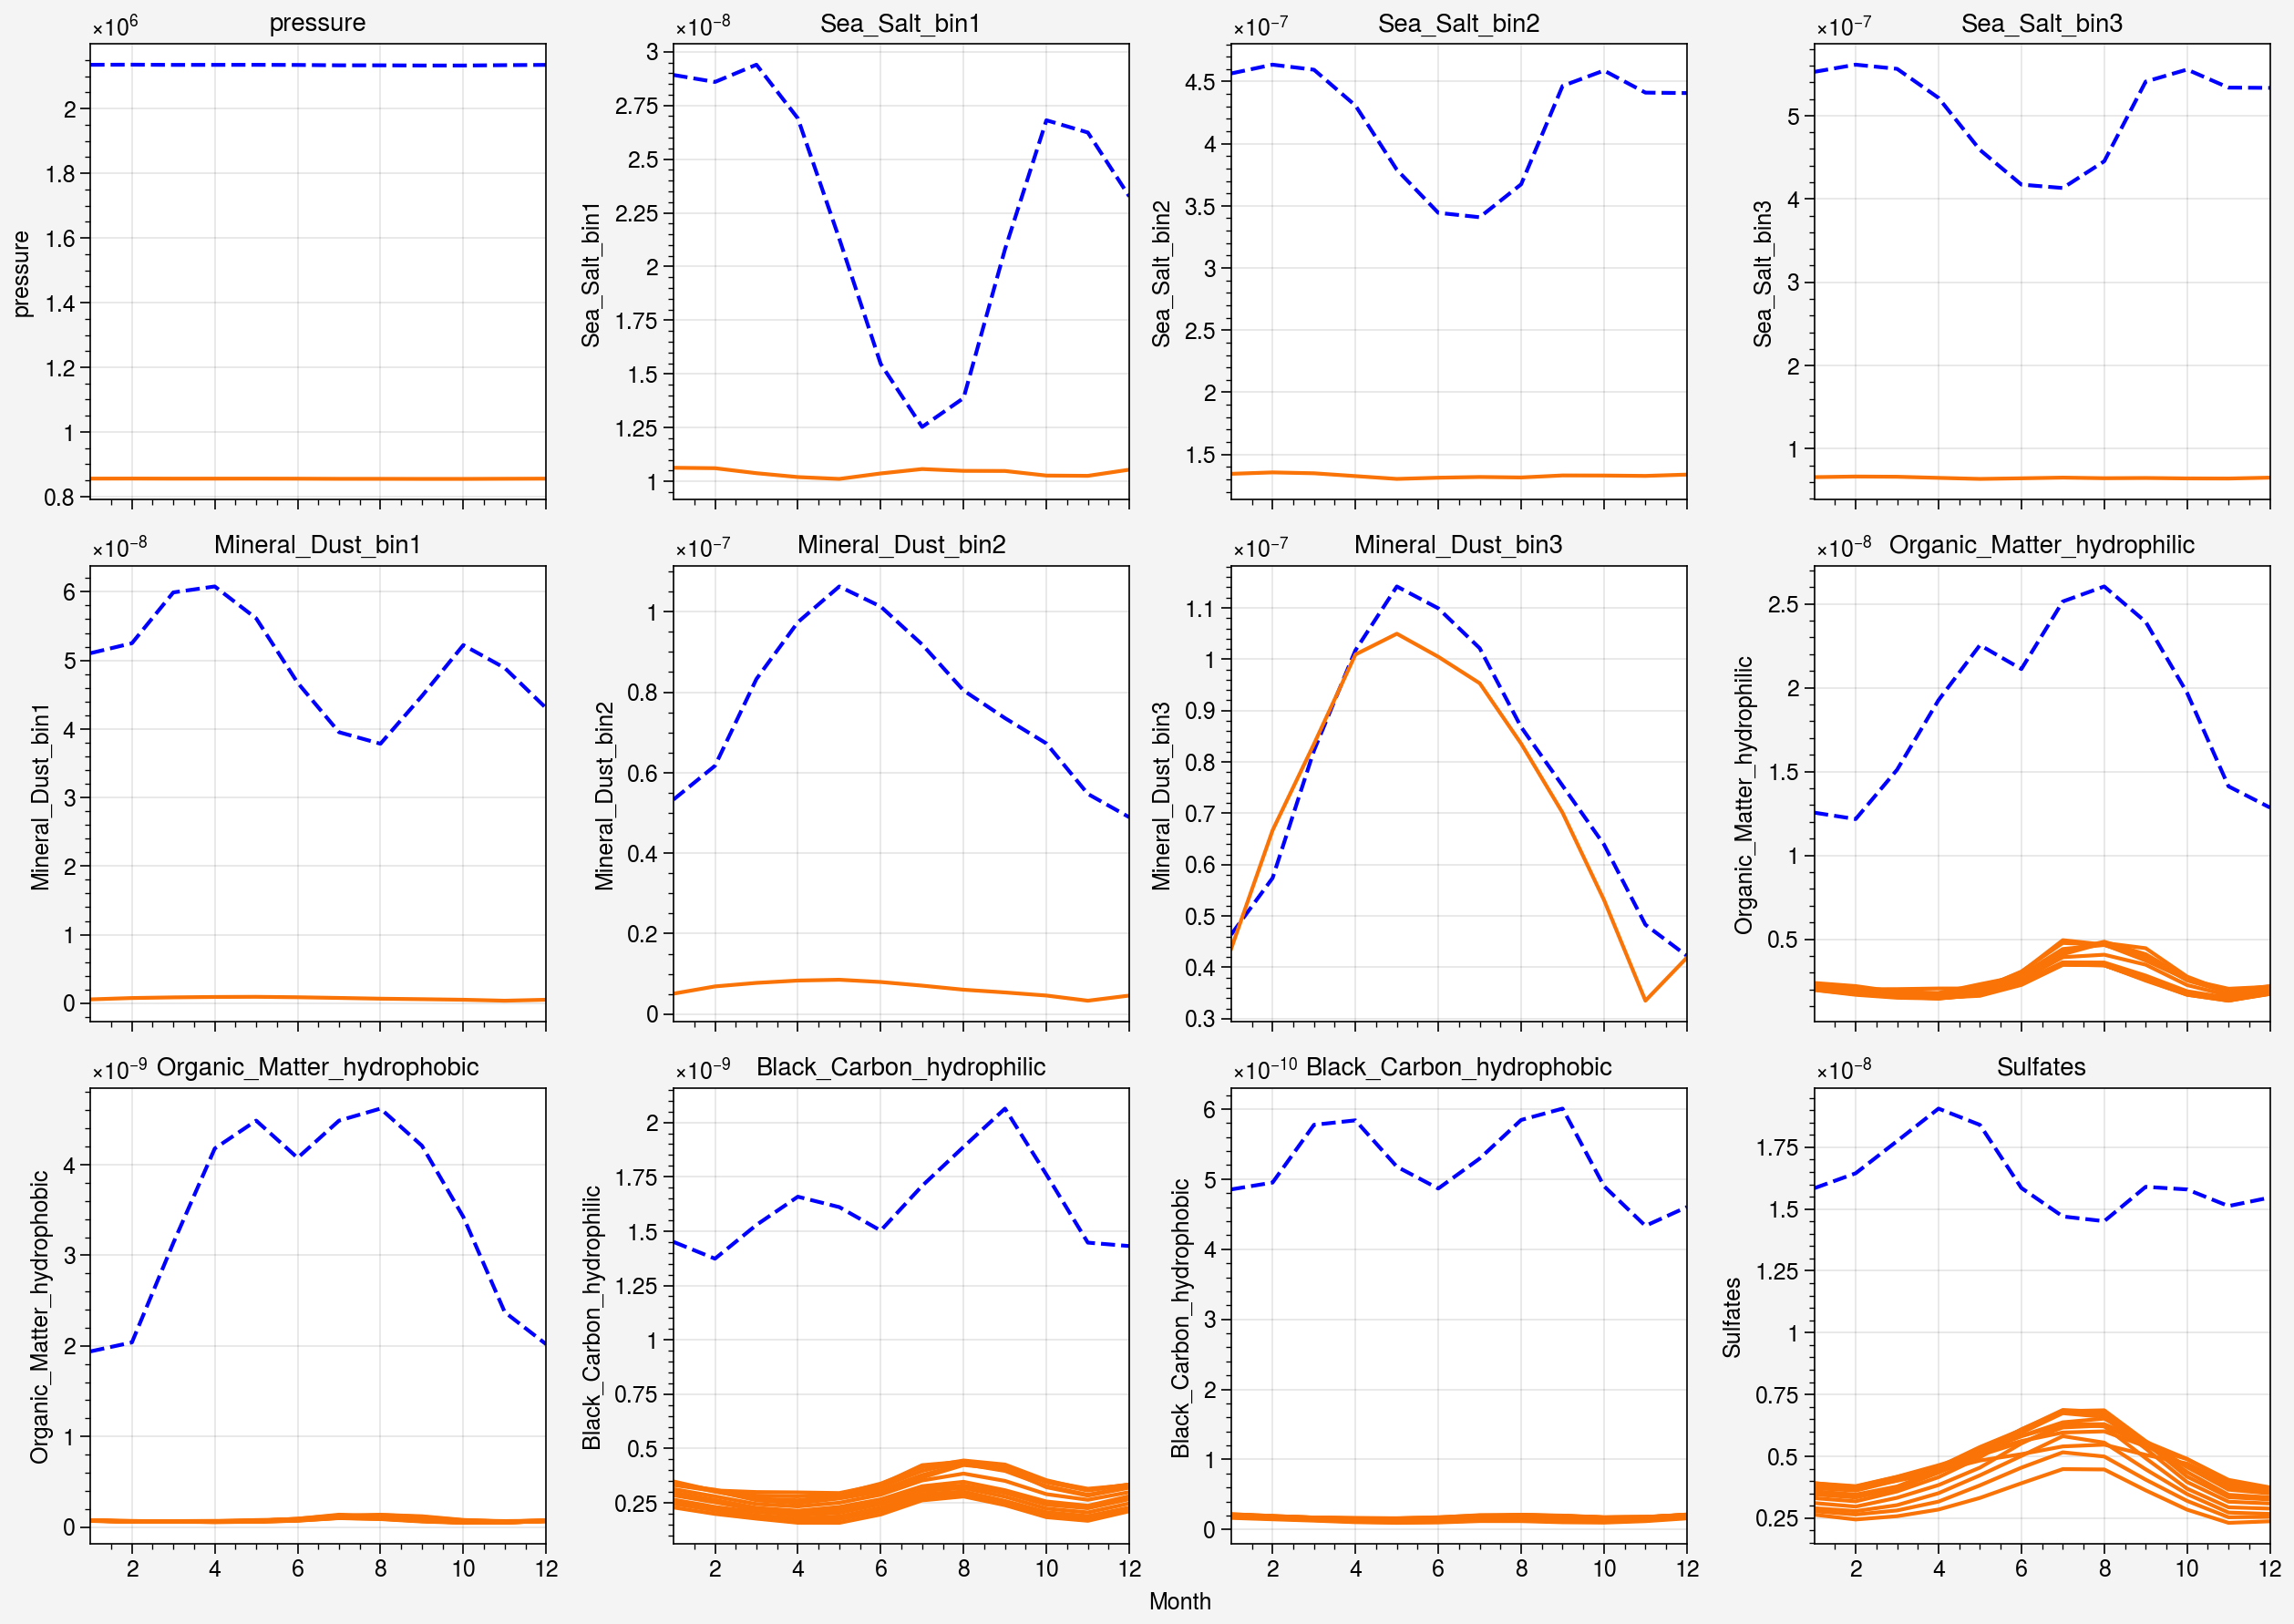

In [12]:
var_selection = [
    "pressure",
    "Sea_Salt_bin1",
    "Sea_Salt_bin2",
    "Sea_Salt_bin3",
    "Mineral_Dust_bin1",
    "Mineral_Dust_bin2",
    "Mineral_Dust_bin3",
    "Organic_Matter_hydrophilic",
    "Organic_Matter_hydrophobic",
    "Black_Carbon_hydrophilic",
    "Black_Carbon_hydrophobic",
    "Sulfates",
]

f, axs = pplt.subplots(ncols=4, nrows=3, sharey=False)

for i in range(12):
    axs[i].format(title=var_selection[i])
    axs[i].plot(
        np.arange(1, 13, 1),
        ds_static[var_selection[i]].mean(dim=["lat", "lon"]).sum(dim="lev"),
        linestyle="--",
        c="b",
    )
    if i < 7:
        axs[i].plot(
            np.arange(1, 13, 1),
            ds_aerosols[var_selection[i]].mean(dim=["lat", "lon"]).sum(dim="lev"),
            c="orange",
        )
    else:
        for epo in range(13):
            axs[i].plot(
                np.arange(1, 13, 1),
                ds_aerosols[var_selection[i]]
                .isel(epoch=epo)
                .mean(dim=["lat", "lon"])
                .sum(dim="lev"),
                c="orange",
            )

axs.format(xlabel="Month")  # ,ylabel='Mass mixing ratio (kg/kg)')